In [12]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(magrittr)
library(glmnet)
library(caret)
library(randomForest)
library(Metrics)
library(ggplot2)
library(tidyr)
library(dplyr)
library(class)
library(FNN)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "foodproductemissions"

I decided to use this data set on kaggle as an extension of my interest in areas of sustainaility and climate change. Ideally, I would like to work in areas and industries targeting climate change, and want to consider data sets that reflect these areas. I have worked on sustainability topics, in particular with behavioral data, in the past. My experience with data has usually been single subject, and clinical. I have wanted to have a braoder data analysis skillset, that would allow me to work with all types of data that would be relevant to climate change topics. 

This original data set considered for this project was posted through https://www.science.org/doi/10.1126/science.aaq0216. This data set was initially posted on kaggle by a user who had rounded emissions values instead of including exact values. Another user on kaggle went back and modified that data set to include original values from the original source, to keep the dataset accurate. 

Poore and Nemeck (2018) publiched a study examining a range of food production processes and how they relate to carbon emissions. There are many phases of food production, each of which has the potential to contribute and generate greenhouse gases in different ways. This article looks at factors like farming, processing, packaging, etc., with their respective carbon emissions. 

In [13]:
food<-read.csv("/kaggle/input/foodproductemissions/Food_Product_Emissions.csv")
View(food)

Food.product,Land.Use.Change,Feed,Farm,Processing,Transport,Packaging,Retail,Total.from.Land.to.Retail,Total.Global.Average.GHG.Emissions.per.kg,Unit.of.GHG.Emissions
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Apples,-0.029,0.000,0.225,0.004,0.096,0.044,0.017,0.357,0.43,kg CO2e per kg food produced
Bananas,-0.025,0.000,0.266,0.059,0.292,0.065,0.021,0.678,0.86,kg CO2e per kg food produced
Barley,0.009,0.000,0.176,0.128,0.035,0.497,0.264,1.109,1.18,kg CO2e per kg food produced
Beef (beef herd),16.278,1.878,39.388,1.269,0.346,0.247,0.164,59.570,99.48,kg CO2e per kg food produced
Beef (dairy herd),0.906,2.508,15.689,1.108,0.424,0.268,0.182,21.085,33.30,kg CO2e per kg food produced
Beet Sugar,0.000,0.000,0.536,0.242,0.629,0.090,0.039,1.536,1.81,kg CO2e per kg food produced
Berries & Grapes,0.025,0.000,0.722,0.000,0.238,0.212,0.017,1.214,1.53,kg CO2e per kg food produced
Brassicas,0.002,0.000,0.278,0.000,0.095,0.045,0.017,0.437,0.51,kg CO2e per kg food produced
Cane Sugar,1.247,0.000,0.485,0.037,0.784,0.083,0.036,2.672,3.20,kg CO2e per kg food produced


The original dataset consists of 11 columns and 43 rows. Of the columns, 2 of them are character and 9 of them numeric values. 

In [14]:
summary(food)
is.na(food)

 Food.product       Land.Use.Change        Feed             Farm       
 Length:43          Min.   :-2.0520   Min.   :0.0000   Min.   : 0.093  
 Class :character   1st Qu.: 0.0010   1st Qu.:0.0000   1st Qu.: 0.338  
 Mode  :character   Median : 0.1800   Median :0.0000   Median : 0.847  
                    Mean   : 1.2642   Mean   :0.4554   Mean   : 3.467  
                    3rd Qu.: 0.8075   3rd Qu.:0.0000   3rd Qu.: 2.245  
                    Max.   :16.2780   Max.   :2.9400   Max.   :39.388  
   Processing       Transport        Packaging          Retail       
 Min.   :0.0000   Min.   :0.0350   Min.   :0.0410   Min.   :0.01500  
 1st Qu.:0.0020   1st Qu.:0.0945   1st Qu.:0.0605   1st Qu.:0.02800  
 Median :0.0650   Median :0.1290   Median :0.0990   Median :0.03900  
 Mean   :0.2555   Mean   :0.1947   Mean   :0.2747   Mean   :0.08467  
 3rd Qu.:0.2975   3rd Qu.:0.2230   3rd Qu.:0.3150   3rd Qu.:0.11350  
 Max.   :1.2690   Max.   :0.7840   Max.   :1.6300   Max.   :0.33200  
 Total

Food.product,Land.Use.Change,Feed,Farm,Processing,Transport,Packaging,Retail,Total.from.Land.to.Retail,Total.Global.Average.GHG.Emissions.per.kg,Unit.of.GHG.Emissions
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


This is a relatively pclean dataset with no missing values. To some extent this is good because it makes cleaning the data easy, however some of the variables I am not interest in. Others need to be changed a bit to work with the models. One thing I note from the general stats of this data is that the outcome variable is a bit higher than the predictor variables, excepting the sum of predictors column (total.land.to.retail). My goal is to consider the other columns except total land to refill, as it would be important in an analysis of this nature to identify specific processes. My fear is that a summed variable would only require further analysis down the line as to what specific varibale from the sum. That being said, I may try models that include the land.to.retail column, to see if it changes the RMSE value. 


A few notes about this data set. First, the feed colum has many 0 values. This is because most foods don't require feed, and the few rows of animal products are the few that have values. The gross emissions column has a wide range of values, with some outliers specific to meat products (some others, but mostly meat products). This isnt suprosing, as meat products have a reputation of having a higher carbon cost. Unfortuantely, for the purpose of analysis, it's hard to exclude these values as outliers because of the products they represent. If I were to remove them, I would only be representing food types that have a low carbon cost. As this is an environmental analysis, it seems counterintuitive to remove high carbon cost products simply to fit a model.

That being said, I am going to examine this (whether these all too relevant outliers impact fitting a model or not). 

In [15]:
#Removing Columns that won't be used. 
food <- food %>% select(-Unit.of.GHG.Emissions)

#Renaming Columns
food <- food %>% rename(food_type = Food.product, land_use = Land.Use.Change, total_emissions = Total.Global.Average.GHG.Emissions.per.kg, total_land = Total.from.Land.to.Retail)

In [16]:
View(food)

food_type,land_use,Feed,Farm,Processing,Transport,Packaging,Retail,total_land,total_emissions
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Apples,-0.029,0.000,0.225,0.004,0.096,0.044,0.017,0.357,0.43
Bananas,-0.025,0.000,0.266,0.059,0.292,0.065,0.021,0.678,0.86
Barley,0.009,0.000,0.176,0.128,0.035,0.497,0.264,1.109,1.18
Beef (beef herd),16.278,1.878,39.388,1.269,0.346,0.247,0.164,59.570,99.48
Beef (dairy herd),0.906,2.508,15.689,1.108,0.424,0.268,0.182,21.085,33.30
Beet Sugar,0.000,0.000,0.536,0.242,0.629,0.090,0.039,1.536,1.81
Berries & Grapes,0.025,0.000,0.722,0.000,0.238,0.212,0.017,1.214,1.53
Brassicas,0.002,0.000,0.278,0.000,0.095,0.045,0.017,0.437,0.51
Cane Sugar,1.247,0.000,0.485,0.037,0.784,0.083,0.036,2.672,3.20


In [17]:
#Assigning numbers to food types for analysis
food <- food %>%
  mutate(food_new = case_when(
    food_type == "Apples" ~ 1,
    food_type == "Bananas" ~ 2,
    food_type == "Barley" ~ 3,
    food_type == "Beef (beef herd)" ~ 4,
    food_type == "Beef (dairy herd)" ~ 5,
    food_type == "Beet Sugar" ~ 6,
    food_type == "Berries & Grapes" ~ 7,
    food_type == "Brassicas" ~ 8,
    food_type == "Cane Sugar" ~ 9,
    food_type == "Cassava" ~ 10,
    food_type == "Cheese" ~ 11,
    food_type == "Citrus Fruit" ~ 12,
    food_type == "Coffee" ~ 13,
    food_type == "Dark Chocolate" ~ 14,
    food_type == "Eggs" ~ 15,
    food_type == "Fish (farmed)" ~ 16,
    food_type == "Groundnuts" ~ 17,
    food_type == "Lamb & Mutton" ~ 18,
    food_type == "Maize" ~ 19,
    food_type == "Milk" ~ 20,
    food_type == "Nuts" ~ 21,
    food_type == "Oatmeal" ~ 22,
    food_type == "Olive Oil" ~ 23,
    food_type == "Onions & Leeks" ~ 24,
    food_type == "Other Fruit" ~ 25,
    food_type == "Other Pulses" ~ 26,
    food_type == "Other Vegetables" ~ 27,
    food_type == "Palm Oil" ~ 28,
    food_type == "Peas" ~ 29,
    food_type == "Pig Meat" ~ 30,
    food_type == "Potatoes" ~ 31,
    food_type == "Poultry Meat" ~ 32,
    food_type == "Rapeseed Oil" ~ 33,
    food_type == "Rice" ~ 34,
    food_type == "Root Vegetables" ~ 35,
    food_type == "Shrimps (farmed)" ~ 36,
    food_type == "Soybean Oil" ~ 37,
    food_type == "Soymilk" ~ 38,
    food_type == "Sunflower Oil" ~ 39,
    food_type == "Tofu" ~ 40,
    food_type == "Tomatoes" ~ 41,
    food_type == "Wheat & Rye" ~ 42,
    food_type == "Wine" ~ 43,
    TRUE ~ NA_integer_
  ))

food <- food %>% select(-food_type)

In [18]:
head(food)

,land_use,Feed,Farm,Processing,Transport,Packaging,Retail,total_land,total_emissions,food_new
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.029,0.000,0.225,0.004,0.096,0.044,0.017,0.357,0.43,1
2,-0.025,0.000,0.266,0.059,0.292,0.065,0.021,0.678,0.86,2
3,0.009,0.000,0.176,0.128,0.035,0.497,0.264,1.109,1.18,3
4,16.278,1.878,39.388,1.269,0.346,0.247,0.164,59.570,99.48,4
5,0.906,2.508,15.689,1.108,0.424,0.268,0.182,21.085,33.30,5
6,0.000,0.000,0.536,0.242,0.629,0.090,0.039,1.536,1.81,6


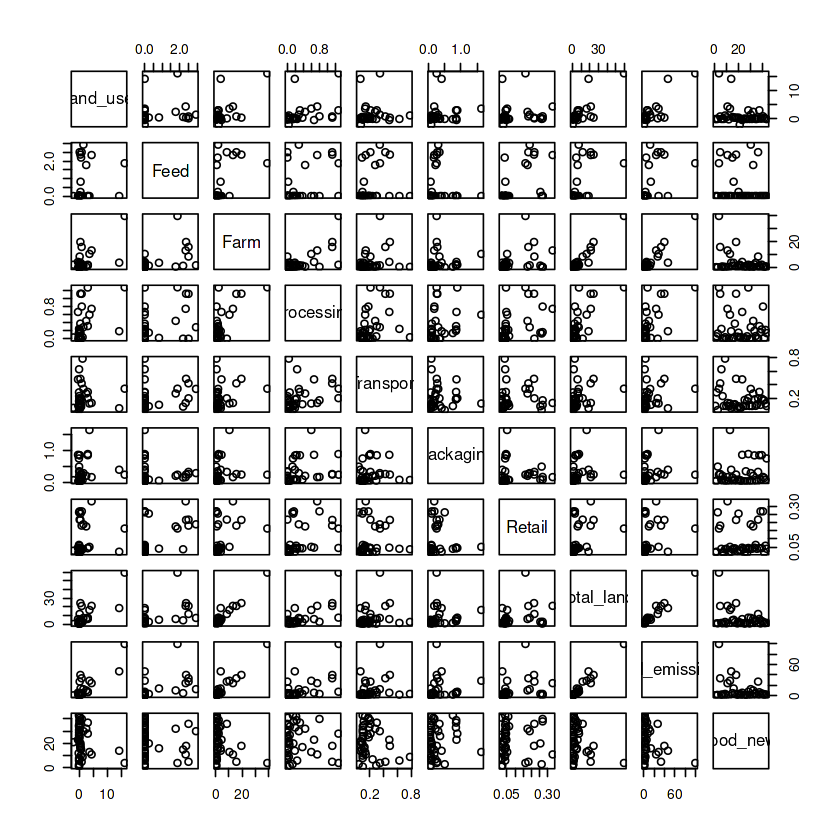

In [19]:
plot(food)

This obviously isn't an ideal scatterplot, as there is a non-uniform dispersement of data across all variable interactions. However, some variables show approximate formation towards positive correlations, for example with farm and emissions, total land and emissions, total land and farm, packaging and emissions, transport and emissions. The total land column represents the sum of other columns, so it doesn't give me the best idea of which variables within the sum might contribute to the correlation. 

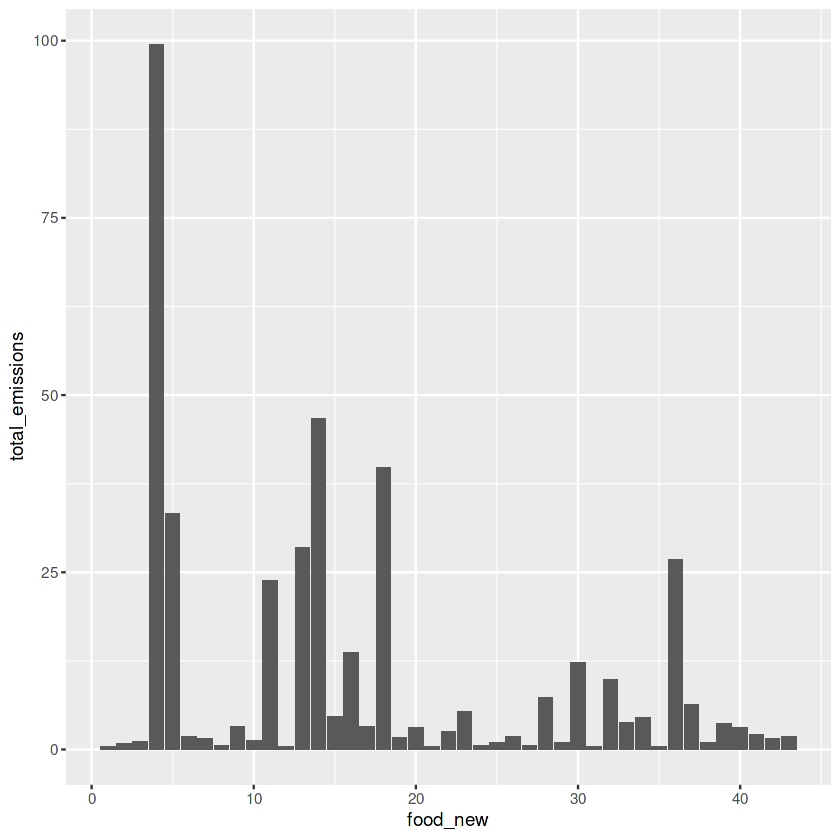

In [14]:
ggplot(food, aes(x = food_new, y = total_emissions)) + geom_bar(stat = "identity")

I am not suprised that there is a strong occurrence of ghg emissions from beef and meat products. I was a bit suprised to see higher emissions for products such as chocolate, though. It is interesting to consider the actual ghg involved in the production of our favorite items. I would love to inquire more here with data on local (farmers market) vs store bought.

In [8]:
#outlier check
food2 <- food[food$total_emissions <= 10, ]

In [20]:
# Set the seed
set.seed(42)
                        
# Split the data 
trainIndex <- createDataPartition(food$total_emissions, p = 0.8, list = FALSE)
trainData <- food[trainIndex, ]
testData <- food[-trainIndex, ]


# Knn
formula <- (total_emissions ~ land_use + Farm + Processing + Transport + Packaging + Retail + food_new)

# Train knn
knn_model <- train(
  formula,
  data = trainData,
  method = "knn",
  preProcess = c("center", "scale")
)

# Predictions
predictions <- predict(knn_model, newdata = testData)

# RMSE
rmse <- sqrt(mean((testData$total_emissions - predictions)^2))

print(rmse)













[1] 4.933935


In [13]:
View(food2)

,land_use,Feed,Farm,Processing,Transport,Packaging,Retail,total_emissions,food_new
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.029,0.000,0.225,0.004,0.096,0.044,0.017,0.43,1
2,-0.025,0.000,0.266,0.059,0.292,0.065,0.021,0.86,2
3,0.009,0.000,0.176,0.128,0.035,0.497,0.264,1.18,3
6,0.000,0.000,0.536,0.242,0.629,0.090,0.039,1.81,6
7,0.025,0.000,0.722,0.000,0.238,0.212,0.017,1.53,7
8,0.002,0.000,0.278,0.000,0.095,0.045,0.017,0.51,8
9,1.247,0.000,0.485,0.037,0.784,0.083,0.036,3.20,9
10,0.589,0.000,0.220,0.000,0.094,0.045,0.039,1.32,10
12,-0.146,0.000,0.307,0.000,0.094,0.045,0.017,0.39,12


In [17]:
# Set the seed
set.seed(42)
                        
# Split the data 
trainIndex <- createDataPartition(food2$total_emissions, p = 0.8, list = FALSE)
trainData <- food2[trainIndex, ]
testData <- food2[-trainIndex, ]


# Knn
formula <- (total_emissions ~ land_use + Farm + Processing + Transport + Packaging + Retail + food_new)

# Train knn
knn_model <- train(
  formula,
  data = trainData,
  method = "knn",
  preProcess = c("center", "scale")
)

# Predictions
predictions <- predict(knn_model, newdata = testData)

# RMSE
rmse <- sqrt(mean((testData$total_emissions - predictions)^2))

print(rmse)

[1] 1.702658


In [ ]:
# Set the seed
set.seed(42)
                        
# Split the data 
trainIndex <- createDataPartition(food2$total_emissions, p = 0.8, list = FALSE)
trainData <- food2[trainIndex, ]
testData <- food2[-trainIndex, ]


# Knn
formula <- (total_emissions ~ land_use + Farm + Processing + Transport + Packaging + Retail + food_new)

# Train knn
knn_model <- train(
  formula,
  data = trainData,
  method = "knn",
  preProcess = c("center", "scale")
)

# Predictions
predictions <- predict(knn_model, newdata = testData)

# RMSE
rmse <- sqrt(mean((testData$total_emissions - predictions)^2))

print(rmse)

In [51]:
# Splitting Data
set.seed(123)  
train_indices <- sample(nrow(food), 0.7 * nrow(food))  
train_data <- food[train_indices, ]  
test_data <- food[-train_indices, ]  


train_x <- train_data[, -which(colnames(train_data) == "total_emissions")]
train_y <- train_data$total_emissions
test_x <- test_data[, -which(colnames(test_data) == "total_emissions")]
test_y <- test_data$total_emissions

# Forest Model
rf_model <- randomForest(train_x, train_y)

# CV
cv_model <- train(train_x, train_y, method = "rf", trControl = trainControl(method = "cv", number = 5))

# RMSE
predictions <- predict(cv_model, test_x)
rmse <- sqrt(mean((predictions - test_y)^2))

print(rmse)


[1] 4.973403


This model seemed to work a bit better